# 0.0 Solution Planning (IOT)

## Input 
1. Business Issue
    - Select the most valuable customers for a loyalty program.
2. Dataset
    - E-commerce sels online, during one year period.

## Output
1. Recommendation list of customers the should be in Loyalty program.
- List: client_id | is_insider

2. Report with business answers:
- 1. Who are eligible to participate the Insiders Program?
- 2. How many customers will be part of the group?
- 3. What are the mainly characteristics of there customers?
- 4. What is the % of revenue coming of these customers?
- 5. What's the revenue expectation for this group next month?
- 6. What are the conditions for someone to be eligible for insiders?
- 7. What are the conditions for someone to be removed from insiders?
- 8. What is the guarantee that the Insiders program is best than the remaining base?
- 9. What actions the marketing team can do for increasing the revenue?

## Tasks

1. Report with business answers:
- 1. Who are eligible to participate the Insiders Program?
    - What is being eligible? What are the most valuable customers?
        - Cost:
        - Buy Experience
        - Basket Size
        - High buy likely
        - Low devolution rate.
- 2. How many customers will be part of the group?
    - Total number of customers
    - % of Insiders Group
- 3. What are the mainly characteristics of there customers?
    - Write customers characteristics:
        - Age
        - Localization
    - Write consuming characteristics:
        - Clustering Features

- 4. What is the % of revenue coming of these customers?
    - Total Revenue vs Insiders Group Revenue
- 5. What's the revenue expectation for this group next month?
    - Insiders Group LTV
    - Cohort Analysis 

- 6. What are the conditions for someone to be eligible for insiders?
    - Define the Insiders update periodicity  
    - The customers needs to be lookalike someone of the Insiders group.


- 7. What are the conditions for someone to be removed from insiders?
    - Define the Insiders update periodicity  
    - The customers needs to be unlookalike someone of the Insiders group.   


- 8. What is the guarantee that the Insiders program is best than the remaining base?
    - A/B test
    - A/B Bayesian test
    - Hypotesis Test


- 9. What actions the marketing team can do for increasing the revenue?
    - Discount
    - New products
    - New employees

## Solutions Benchmark
1. Desk Research

## 0.1 Import libraries

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import re

import umap.umap_ as umap
import matplotlib.pyplot as plt
from sklearn import cluster as c 
from sklearn import metrics as m
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
import matplotlib.gridspec as gridspec
from plotly import express as px


plt.rcParams["figure.figsize"] = (15,8)


## 0.2 Load dataset

In [2]:
df0 = pd.read_csv('data.csv', encoding='latin1')
df0.columns=df0.columns.str.lower()
df0.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


# 1.0 Data Description

In [3]:
df1=df0.copy()

## 1.1 data dimensions

In [4]:
df1.shape

(541909, 8)

## 1.2 N/As treatment

In [5]:
df1.isna().sum()/len(df1)

invoiceno      0.000000
stockcode      0.000000
description    0.002683
quantity       0.000000
invoicedate    0.000000
unitprice      0.000000
customerid     0.249267
country        0.000000
dtype: float64

In [6]:
# remove na
df1 = df1.dropna( subset=['description','customerid'])
print( 1-(len(df1)/len(df0)))

0.24926694334288602


In [7]:
df1.shape

(406829, 8)

In [8]:
df1.isna().sum()

invoiceno      0
stockcode      0
description    0
quantity       0
invoicedate    0
unitprice      0
customerid     0
country        0
dtype: int64

## 1.3 data types treatment

In [9]:
df1.dtypes

invoiceno       object
stockcode       object
description     object
quantity         int64
invoicedate     object
unitprice      float64
customerid     float64
country         object
dtype: object

In [10]:
df1.head(3)

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom


In [11]:
df1['invoicedate']=df1['invoicedate'].str.split(expand=True)[0]
df1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010,3.39,17850.0,United Kingdom


In [12]:
#invoice date
df1['invoicedate'] = pd.to_datetime( df1['invoicedate'], format="%m/%d/%Y",errors='coerce')

df1['customerid']=df1['customerid'].astype(int)
df1.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850,United Kingdom


In [13]:
df1.dtypes

invoiceno              object
stockcode              object
description            object
quantity                int64
invoicedate    datetime64[ns]
unitprice             float64
customerid              int32
country                object
dtype: object

## 1.4 descriptive statistics - numeric

In [14]:
num_attributes = df1.select_dtypes(include=['int64','float64','int32'])
cat_attributes = df1.select_dtypes(exclude=['int64','float64','datetime64[ns]'])

In [15]:
pd.concat([num_attributes.describe(percentiles=[.5]).T,num_attributes.agg(['skew','kurtosis']).T],axis=1)

,count,mean,std,min,50%,max,skew,kurtosis
quantity,406829.0,12.061303,248.693370,-80995.0,5.00,80995.0,0.182663,94317.563673
unitprice,406829.0,3.460471,69.315162,0.0,1.95,38970.0,452.219019,246924.542988
customerid,406829.0,15287.690570,1713.600303,12346.0,15152.00,18287.0,0.029835,-1.179982


In [60]:
#how many negative quantitys there is?

aux0=num_attributes[num_attributes['quantity']<0]
print(aux0['quantity'].head(3))
print(f"There is {len(aux0)/len(num_attributes)} negative quantity")

141    -1
154    -1
235   -12
Name: quantity, dtype: int64
There is 0.021888803403887137 negative quantity


In [16]:
# inspect negative quantity
# inspect price equal zero

## 1.5 descriptive statistics - categoric

In [17]:
cat_attributes.head(1)

,invoiceno,stockcode,description,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,17850,United Kingdom


In [55]:
#How many invoices with letters there is?

aux0=cat_attributes[cat_attributes['invoiceno'].str.contains('[^0-9]+', na=False)]
print(aux0['invoiceno'].head(3))
print(f"There is {len(aux0)/len(cat_attributes)} invoices with letters")

# Because it has only 2% of stock codes with letters-only, in this Crisp-DM circle it will be dropped


141    C536379
154    C536383
235    C536391
Name: invoiceno, dtype: object
There is 0.021888803403887137 invoices with letters


In [65]:
#How many stockcodes with letters there is?

aux0=cat_attributes[cat_attributes['stockcode'].str.contains('[^0-9]+', na=False)]
print(aux0['stockcode'].head(3), len(aux0)/len(cat_attributes))

aux0=cat_attributes[~cat_attributes['stockcode'].str.contains('[0-9]+', na=False)]
print(aux0['stockcode'].head(3), len(aux0)/len(cat_attributes))
print(aux0['stockcode'].unique())

# Because it has only 0,4% of stock codes with letters-only, in this Crisp-DM circle it will be dropped

0    85123A
2    84406B
3    84029G
Name: stockcode, dtype: object 0.0880197822672425
45     POST
141       D
386    POST
Name: stockcode, dtype: object 0.004390050856748167
['POST' 'D' 'M' 'BANK CHARGES' 'PADS' 'DOT' 'CRUK']


In [68]:
# Description
df1.head(3)

# For now it will be dropped

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850,United Kingdom


In [73]:
# Country
print(len(df1['country'].unique()), "\n", 
df1['country'].value_counts(normalize=True))

37 
 United Kingdom          0.889509
Germany                 0.023339
France                  0.020871
EIRE                    0.018398
Spain                   0.006226
Netherlands             0.005828
Belgium                 0.005086
Switzerland             0.004614
Portugal                0.003638
Australia               0.003095
Norway                  0.002669
Italy                   0.001974
Channel Islands         0.001863
Finland                 0.001708
Cyprus                  0.001529
Sweden                  0.001136
Austria                 0.000986
Denmark                 0.000956
Japan                   0.000880
Poland                  0.000838
USA                     0.000715
Israel                  0.000615
Unspecified             0.000600
Singapore               0.000563
Iceland                 0.000447
Canada                  0.000371
Greece                  0.000359
Malta                   0.000312
United Arab Emirates    0.000167
European Community      0.000150
RSA  

# 2.0 Feature Filtering/Cleaning

In [21]:
df2=df1.copy()

In [22]:
len(df2.loc[df2['quantity']<0, :])/len(df2)

0.021888803403887137

In [23]:
#only positive prices
df2=df2.loc[df2['unitprice']>0]

#only stock code with numbers
df2=df2[~df2['stockcode'].str.contains('[0-9]+', na=False)]

returns=df2[df2['quantity']<0]
purchases=df2[df2['quantity']>0]

# 3.0 Feature Engineering

In [24]:
# data reference
df3=df2.copy()

In [25]:
df_ref=df3[['customerid']].drop_duplicates(ignore_index=True)
df_ref.head(3)

,customerid
0,12583
1,14527
2,12791


In [26]:
purchases.head()

,invoiceno,stockcode,description,quantity,invoicedate,unitprice,customerid,country
45,536370,POST,POSTAGE,3,2010-12-01,18.00,12583,France
386,536403,POST,POSTAGE,1,2010-12-01,15.00,12791,Netherlands
1123,536527,POST,POSTAGE,1,2010-12-01,18.00,12662,Germany
2239,536569,M,Manual,1,2010-12-01,1.25,16274,United Kingdom
2250,536569,M,Manual,1,2010-12-01,18.95,16274,United Kingdom


In [27]:
purchases['gross_revenue'] = purchases['quantity'] * purchases['unitprice']

#Monetary
df_monetary = purchases[['customerid', 'gross_revenue']].groupby( 'customerid').sum().reset_index()
df_ref=df_ref.merge(df_monetary,on='customerid',how='left')
print(df_ref.isna().sum())
df_ref.head()

customerid         0
gross_revenue    123
dtype: int64


C:\Users\kosmo\AppData\Local\Temp\ipykernel_11008\1843768929.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  purchases['gross_revenue'] = purchases['quantity'] * purchases['unitprice']


,customerid,gross_revenue
0,12583,576.0
1,14527,1.0
2,12791,15.0
3,12662,306.0
4,16274,20.2


In [28]:
#recency
df_recency = purchases[['customerid', 'invoicedate']].groupby( 'customerid').max().reset_index()
df_recency['recencydays'] = ( purchases['invoicedate'].max() - df_recency['invoicedate'] ).dt.days
df_recency= df_recency[['customerid','recencydays']].copy()
df_ref=df_ref.merge(df_recency, how='left', on='customerid')

print(df_ref.isna().sum())
df_ref.head()

customerid         0
gross_revenue    123
recencydays      123
dtype: int64


,customerid,gross_revenue,recencydays
0,12583,576.0,2.0
1,14527,1.0,253.0
2,12791,15.0,373.0
3,12662,306.0,0.0
4,16274,20.2,373.0


In [29]:
# Frequency
df_freq = purchases[['customerid', 'invoiceno']].drop_duplicates().groupby( 'customerid' ).count().reset_index()
df_ref = pd.merge( df_ref, df_freq, on='customerid', how='left' )
df_ref.isna().sum()

customerid         0
gross_revenue    123
recencydays      123
invoiceno        123
dtype: int64

In [30]:
 # Avg Ticket
df_avg_ticket = purchases[['customerid','gross_revenue']].groupby( 'customerid' ).mean().reset_index().rename( columns={'gross_revenue':'avg_ticket'} )
df_ref = pd.merge( df_ref, df_avg_ticket, on='customerid', how='left')
df_ref.isna().sum()

customerid         0
gross_revenue    123
recencydays      123
invoiceno        123
avg_ticket       123
dtype: int64

In [31]:
# # Gross Revenue ( Quantity * Price)
# df3['grossrevenue']=df3['quantity'] * df3['unitprice']

# # Monetary
# df_monetary=df3[['customerid','grossrevenue']].groupby(['customerid']).sum().reset_index()
# df_ref= df_ref.merge(df_monetary, on='customerid', how='left')


# #Recency - Last day purchase
# df_recency=df3[['customerid', 'invoicedate']].groupby('customerid').max().reset_index()
# df_recency['recencydays'] = (df3['invoicedate'].max()- df_recency['invoicedate']).dt.days
# df_recency= df_recency[['customerid','recencydays']].copy()

# df_ref= df_ref.merge(df_recency, on='customerid',how='left')

# # Frequency
# df_freq=df3[['customerid','invoiceno']].drop_duplicates().groupby('customerid').count().reset_index()
# df_ref=df_ref.merge(df_freq,on='customerid',how='left')


# #Avg ticket
# df_avg_ticket=df3[['customerid','grossrevenue']].groupby('customerid').mean().reset_index().rename(columns={"grossrevenue":"avgticket"})
# df_ref=df_ref.merge(df_avg_ticket,on='customerid',how='left')
# df_ref.isna().sum()

# 4.0 EDA (Exploratory Data Analysis)

In [32]:
df4=df_ref.dropna().copy()
df4.head()

,customerid,gross_revenue,recencydays,invoiceno,avg_ticket
0,12583,576.0,2.0,15.0,38.4
1,14527,1.0,253.0,1.0,1.0
2,12791,15.0,373.0,1.0,15.0
3,12662,306.0,0.0,10.0,30.6
4,16274,20.2,373.0,1.0,10.1


# 5.0 Data Preparation

In [33]:
df5=df4.copy()

In [34]:
from sklearn.preprocessing import StandardScaler

ss=StandardScaler()

df5['gross_revenue'] = ss.fit_transform(df5[['gross_revenue']])
df5['recencydays'] = ss.fit_transform(df5[['recencydays']])
df5['invoiceno'] = ss.fit_transform(df5[['invoiceno']])
df5['avg_ticket'] = ss.fit_transform(df5[['avg_ticket']])

# 6.0 Feature Selection

In [35]:
df6=df5.copy()

# 7.0 Hyperparameter Tuning

In [36]:
df7=df6.copy()

In [37]:
X=df6.drop(columns=['customerid'])

In [38]:
clusters= [2, 3, 4, 5, 6, 7, 8, 9]

## 7.1 Within-Cluster Sum of Squares (WSS)

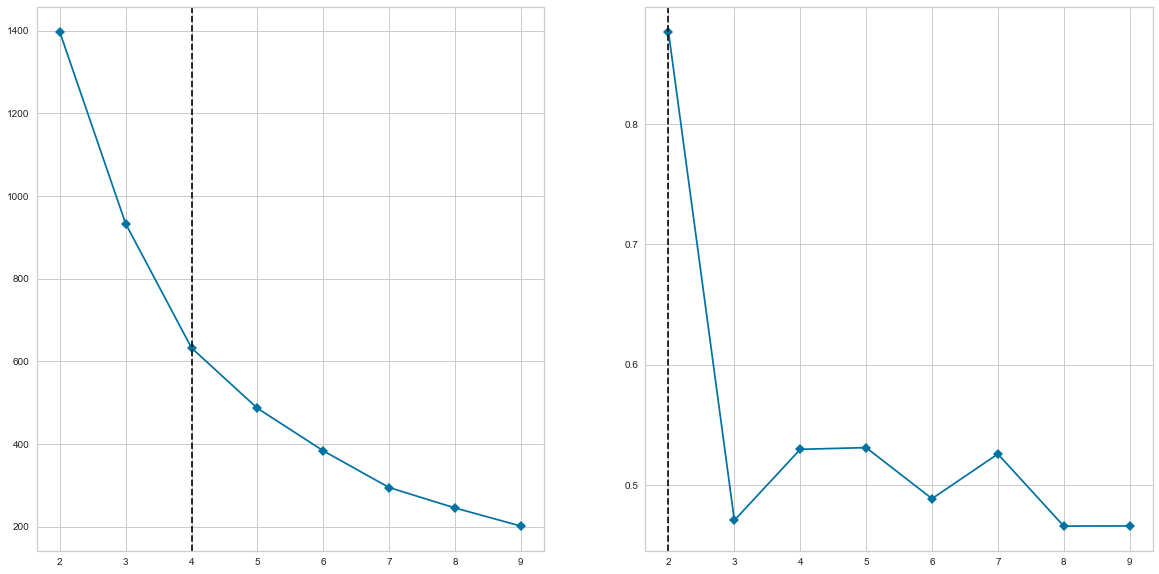

In [39]:
plt.subplot(1,2,1)
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False, metric='distortion')
kmeans.fit(X)


plt.subplot(1,2,2)
kmeans = KElbowVisualizer( c.KMeans(), k=clusters, timings=False, metric='silhouette')
kmeans.fit(X)
plt.gcf().set_size_inches(20,10)
plt.show()

In [40]:
## 7.1 Silhouette Analysis

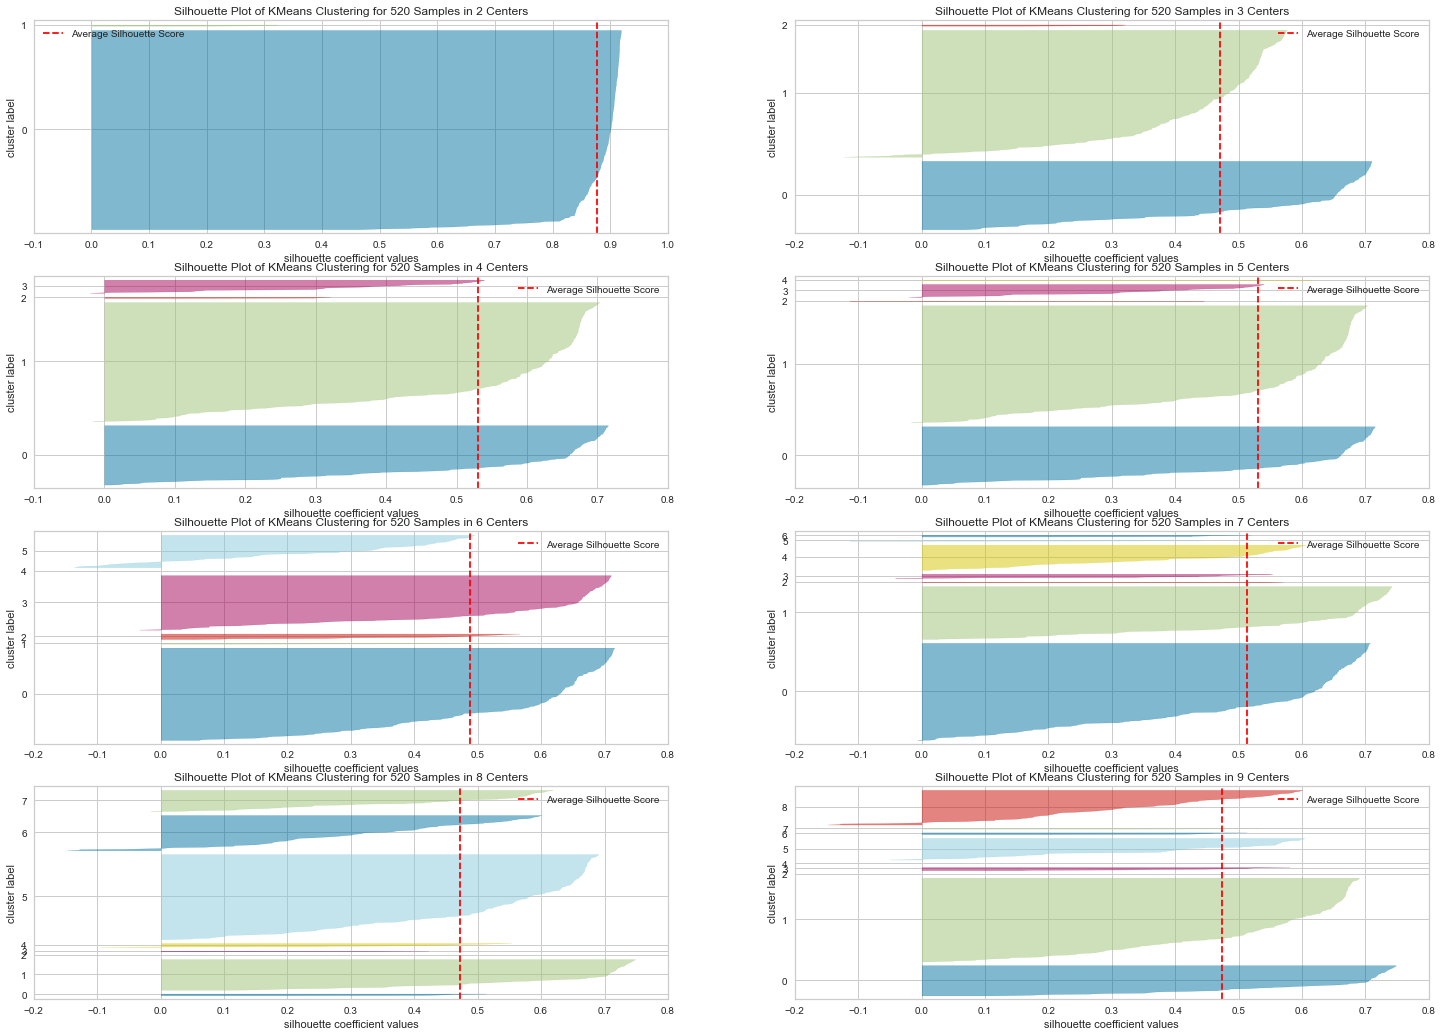

In [41]:
fig, ax = plt.subplots( 4, 2, figsize=(25, 18))

for k in clusters:
    km = c.KMeans(n_clusters=k, init="k-means++", n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(k, 2)
    vis_silhouette = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    vis_silhouette.fit(X)
    vis_silhouette.finalize()

# 8.0 Model training

## 8.1 K-Means

In [42]:
# model definition
k=6
kmeans = c.KMeans(init='k-means++', n_clusters=k, n_init=10, max_iter=300, random_state=42)

#model training
kmeans.fit(X)
labels = kmeans.labels_


## 8.2 Cluster Validation

In [43]:
## WSS
print(f"WSS {kmeans.inertia_}")
m.silhouette_score(X,labels,metric='euclidean')

WSS 383.6130389409454


0.4878311130591837

# 9.0 Cluster Analysis

In [44]:
df9=df6.copy()
df9['cluster']=labels
df9.head(1)

,customerid,gross_revenue,recencydays,invoiceno,avg_ticket,cluster
0,12583,0.306992,-1.026872,3.593257,-0.144802,2


## 9.1 Visual Inspection

p:\Anaconda3\envs\automl\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(


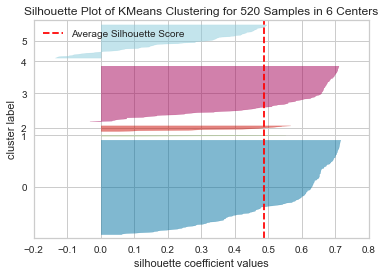

In [45]:
visualizer = SilhouetteVisualizer( kmeans, init='k-means++', colors='yellowbrick')
visualizer.fit(X)
visualizer.finalize()

## 9.2 2d plot

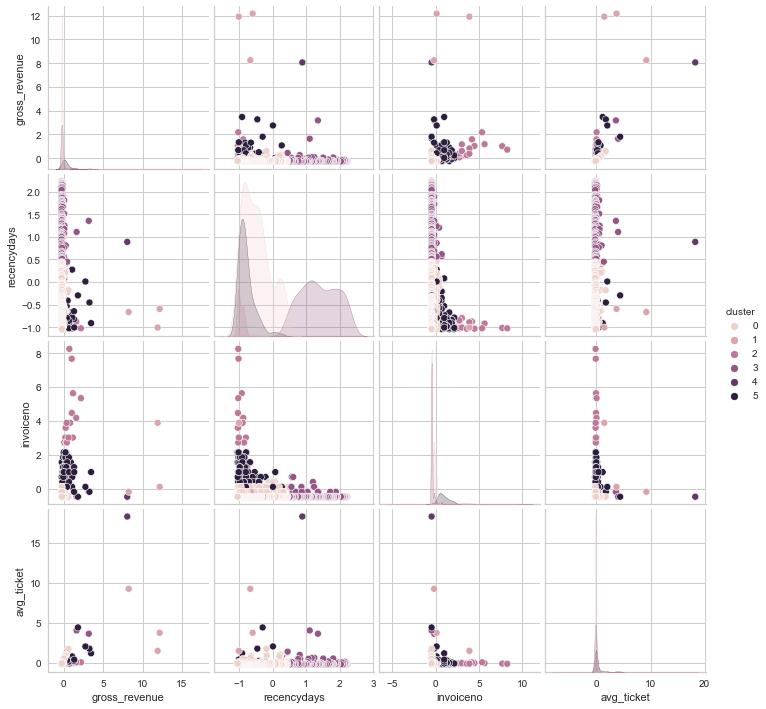

In [46]:
df_viz = df9.drop(columns='customerid',axis=1)
sns.pairplot(df_viz, hue='cluster')

## 9.3 UMAP 

<AxesSubplot:xlabel='embedding_x', ylabel='embedding_y'>

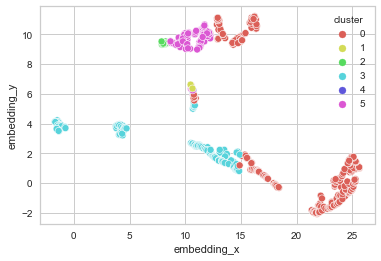

In [47]:
reducer = umap.UMAP(n_neighbors=20, random_state=42)
embedding = reducer.fit_transform( X )

# embedding
df_viz['embedding_x']=embedding[:,0]
df_viz['embedding_y']=embedding[:,1]

# plot UMAP
sns.scatterplot(x='embedding_x',y='embedding_y',
                hue='cluster',
                palette=sns.color_palette('hls', n_colors= len(df_viz['cluster'].unique())),
                data=df_viz)

## 9.3 Cluster Profile

In [48]:
# Number of customer
df_cluster=df9[['customerid','cluster']].groupby('cluster').count().reset_index()
df_cluster['pc_customer']=100*df_cluster['customerid']/df_cluster['customerid'].sum()

# Avg Gross Revenue
df_avg_gross_revenue= df9[['grossrevenue','cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster= df_cluster.merge( df_avg_gross_revenue, how='inner', on='cluster')

# Avg recency days
df_avg_recencydays= df9[['recencydays','cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster= df_cluster.merge( df_avg_recencydays, how='inner', on='cluster')


# Avg invoice_no
df_avg_invoiceno= df9[['invoiceno','cluster']].groupby( 'cluster' ).mean().reset_index()
df_cluster= df_cluster.merge( df_avg_invoiceno, how='inner', on='cluster')

# Avg Ticket
df_ticket = df9[['avgticket','cluster']].groupby('cluster').mean().reset_index()
df_cluster = df_cluster.merge(df_ticket, how='inner', on='cluster')

df_cluster

KeyError: "['grossrevenue'] not in index"

### Cluster 0: - Low Value, Low Frequency, High Recency

### Cluster 1: - Extremely high values, bought every 3 days

### Cluster 2: - High value, but buys at a low frequency and weekly rate

### Cluster 3: - Medium value, Medium frequency, Medium recency
